In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

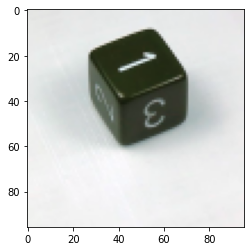

In [34]:
img = cv2.imread("dice/train/d6/d6_45angle_0000.jpg")
scale_percent = 20
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
plt.imshow(img)

(96, 96, 3)

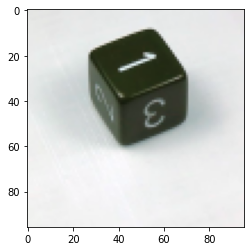

In [12]:
plt.imshow(resized)
resized.shape

In [39]:
import cv2
from os.path import splitext, join


def normalizeBoundingBox(x, y, w, h, image_width, image_height):
    """This function normalizes a bounding box.
    It takes a coordinate (x,y) from the top-left corner, calculates the center of the box,
    and then it divides each component by the image dimensions.
    Args:
       x (int)           : top-left x-coordinate.
       y (int)           : top-left y-coordinate.
       w (int)           : bounding box width.
       h (int)           : bounding box height.
       image_width (int) : image width.
       image_height (int): image height.
    Returns:
       x_norm (float)    : normalized x-center coordinate.
       y_norm (float)    : normalized y-center coordinate.
       w_norm (float)    : normalized bounding box width.
       h_norm (float)    : normalized bounding box height.
    """

    x_center = (x + (w // 2)) / float(image_width)
    y_center = (y + (h // 2)) / float(image_height)
    w_norm = w / float(image_width)
    h_norm = h / float(image_height)

    return x_center, y_center, w_norm, h_norm


def generateBoundingBoxAndSave(im):
    """This function generate a bounding box and save it to a file.
    It takes an input image, a destination folder, and a new name for the image.
    Args:
       from_path         : The input image.
       to_path           : The destination folder.
       new_name          : A new name for the image in the destination folder.
    Returns:
       new_filename      : The new filename for the image.
       x_norm (float)    : normalizec x-center coordinate.
       y_norm (float)    : normalized y-center coordinate.
       w_norm (float)    : normalized bounding box width.
       h_norm (float)    : normalized bounding box height.
    """
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresImg = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Warning: In OpenCV old versions the next function returns three results: image, contours, hierarchy
    contours, hierarchy = cv2.findContours(cv2.bilateralFilter(
        thresImg, 9, 75, 75), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)    

    largest_area = 0
    largest_contour_index = 0

    index = 0
    for cnt in contours:
        area = cv2.contourArea(cnt, False)
        if area > largest_area:
            largest_area = area
            largest_contour_index = index
        index += 1

    x, y, w, h = cv2.boundingRect(contours[largest_contour_index])
    # im.shape returns height, width, color channels)
    x_norm, y_norm, w_norm, h_norm = normalizeBoundingBox(
        x, y, w, h, im.shape[1], im.shape[0])

    color = (255, 0, 0) 
    thickness = 1
    im = cv2.rectangle(im, (x,y),(x+w,y+h),color, thickness )

    return im

In [40]:
boxed = generateBoundingBoxAndSave(img)

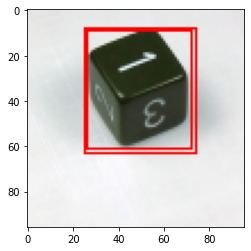

In [41]:
plt.imshow(boxed)

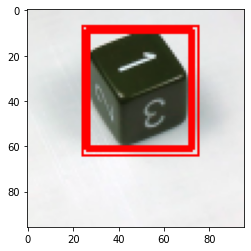

In [30]:
plt.imshow(img)